In [9]:
import matplotlib.pyplot as plt

colors=['blue','red','green','yellow','black','purple','orange','pink','brown','cyan']
colors = 000000

def plot_csv(x,y,acceleration_x,acceleration_y):

    # Plot the data
    plt.figure(figsize=(8, 6))
    ex=1e5
    plt.xlim(-ex,ex)
    plt.ylim(-ex,ex)
    plt.scatter(x, y, color= colors[:2], marker='o', alpha=0.5)
    # Add acceleration vectors
    plt.quiver(x, y, acceleration_x, acceleration_y, angles='xy', scale_units='xy', scale=1, color='red', label='Acceleration')
    plt.title('Scatter Plot of Data')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()



In [10]:
def read_csv(file_name):
    x = []
    y = []
    acceleration_x = []
    acceleration_y = []
    with open(file_name, 'r') as f:
        for line in f:
            if line == '\n':
                plot_csv(x,y,acceleration_x,acceleration_y)
                x = []
                y = []
                acceleration_x = []
                acceleration_y = []
                continue
            data = line.split(',')
            x.append(float(data[0]))
            y.append(float(data[1]))
            acceleration_x.append(float(data[2]))
            acceleration_y.append(float(data[3]))

            
    


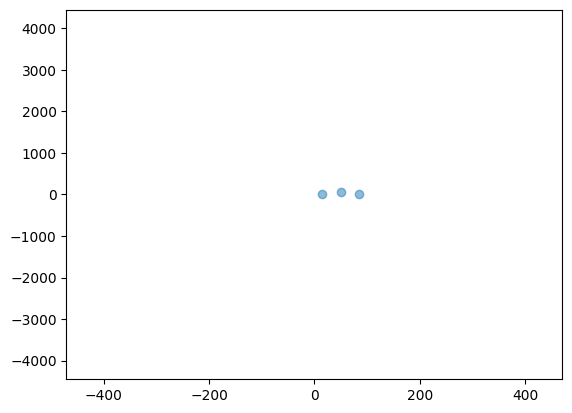

In [11]:
import numpy as np
import matplotlib.animation as animation 

x = np.array([])
y = np.array([])
acceleration_x = np.array([])
acceleration_y = np.array([])

file_name = '../mpi_BarnesHut/data.csv'
count = 0
with open(file_name, 'r') as f:
    tmp_x = np.array([])
    tmp_y = np.array([])
    tmp_acceleration_x = np.array([])
    tmp_acceleration_y = np.array([])

    # count the number of bodies
    for line in f:
        if line != '\n':
            count += 1
        else:
            break

    for line in f:
        if line == '\n':
            #plot_csv(x,y,acceleration_x,acceleration_y)
            x = np.append(x,tmp_x)
            y = np.append(y,tmp_y)
            acceleration_x = np.append(acceleration_x,tmp_acceleration_x)
            acceleration_y = np.append(acceleration_y,tmp_acceleration_y)
            
            tmp_x = np.array([])
            tmp_y = np.array([])
            tmp_acceleration_x = np.array([])
            tmp_acceleration_y = np.array([])
            continue
        data = line.split(',')
        tmp_x = np.append(tmp_x,float(data[0]))
        tmp_y = np.append(tmp_y,float(data[1]))
        tmp_acceleration_x=np.append(tmp_acceleration_x,float(data[2]))
        tmp_acceleration_x=np.append(tmp_acceleration_y,float(data[3]))

fig, ax = plt.subplots()

pad=100
ax.set_xlim(-max(x)-(max(x)//4)-pad,max(x)+(max(x)//4)+pad)
ax.set_ylim(-max(y)-(max(y)//4)-pad,max(y)+(max(y)//4) + pad)
scat = ax.scatter(x[0:count], y[0:count],marker='o', alpha=0.5)

def update(frame):
    x1 = x[frame:frame+count]
    y1 = y[frame:frame+count]

    data = np.stack([x1,y1]).T
    scat.set_offsets(data)


    return scat


In [12]:
# FILE = '../mpi_parallel_nbodies/data.csv'
# read_csv(FILE)


ani = animation.FuncAnimation(fig, func=update, frames=range(0,len(x)-count,count), interval=100)
ani.save('triangle-animation.mp4', writer='ffmpeg', fps=10)
plt.show()